<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Medidas_de_Desempe%C3%B1o_APTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [173]:
BASE_SNAP = pd.read_excel("/content/Control de Comisión.xlsm", sheet_name="Base Snap",skiprows=1)
Indices= pd.read_excel("/content/Base Indices.xlsx", sheet_name="Datos")

In [ ]:
# Definir una lista de tuplas con los nombres y números de columna
dataframes_info = [
    ("GYC", 2),
    ("ECL", 164),
    ("CDV", 29),
    ("FJM", 218),
    ("MLT", 515),
    ("AVV", 542),
    ("FDP", 731),
    ("INA", 758),
    ("FJJ", 866),
    ("BAT", 920),
    ("FTC", 947),
    ("FIN", 974)
]
# Crear una lista para almacenar los DataFrames resultantes
dataframes = []

# Iterar sobre la lista de tuplas y crear los DataFrames
for name, col_num in dataframes_info:
    df = BASE_SNAP.iloc[:, [0, col_num]]
    df.columns = ["Fecha", "Valor_Unidad"]
    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
    dataframes.append((name, df))

# Ahora puedes acceder a los DataFrames individuales usando sus nombres
GYC = dataframes[0][1]
ECL = dataframes[1][1]
CDV = dataframes[2][1]
FJM = dataframes[3][1]
MLT = dataframes[4][1]
AVV = dataframes[5][1]
FDP = dataframes[6][1]
INA = dataframes[7][1]
FJJ = dataframes[8][1]
BAT = dataframes[9][1]
FTC = dataframes[10][1]
FIN = dataframes[11][1]

In [ ]:
# Crear un diccionario para almacenar las fechas y valores de unidad de los últimos 5 valores de cada DataFrame
ultimos_valores = {}
# Iterar sobre la lista de DataFrames y obtener los últimos 5 valores
for name, df in dataframes:
    ultimos_valores[name] = df["Valor_Unidad"].tolist()
# Crear un DataFrame con los valores de unidad de los últimos 5 valores de cada DataFrame
APTs = pd.DataFrame(ultimos_valores)
# Agregar las fechas como índice
APTs.index = df["Fecha"].tolist()
# Mostrar el DataFrame de los últimos valores de forma horizontal
APTs

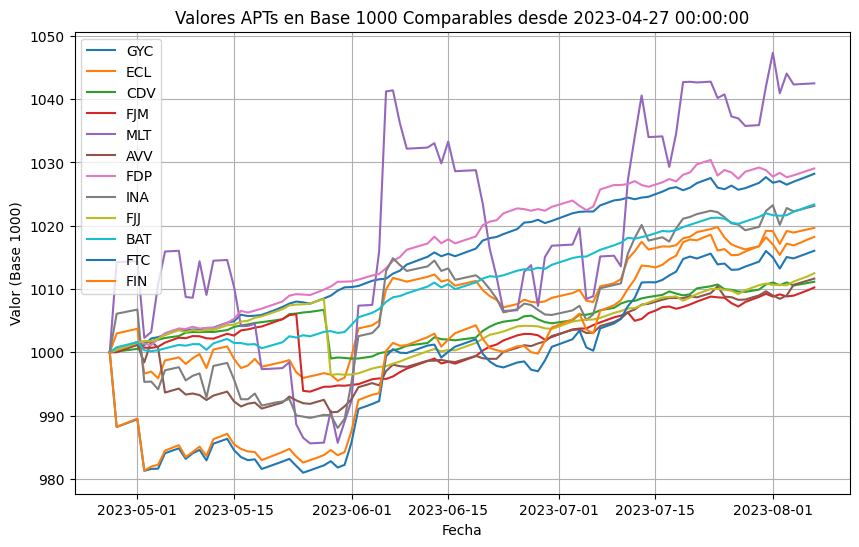

In [178]:
# Encuentra la fecha en la que todos los valores comienzan (la primera fecha en la que todos los valores están presentes)
fecha_inicio = APTs.dropna().index[0]

# Filtra el DataFrame a partir de la fecha de inicio
APTs_filtrados = APTs.loc[fecha_inicio:]

# Divide todos los valores por el primer valor y luego multiplica por 1000 para que todos los valores comiencen en 1000
APTs_comparables = (APTs_filtrados / APTs_filtrados.iloc[0]) * 1000
# Grafica los valores
plt.figure(figsize=(10, 6))
for column in APTs_comparables.columns:
    plt.plot(APTs_comparables.index, APTs_comparables[column], label=column)
plt.title('Valores APTs en Base 1000 Comparables desde {}'.format(fecha_inicio))
plt.xlabel('Fecha')
plt.ylabel('Valor (Base 1000)')
plt.legend()
plt.grid(True)
plt.show()

# **Libre Riesgo**

In [ ]:
# Crea un DataFrame con BANREP
Banrep = Indices.iloc[:, [0, 4]]  # Columnas 1 (fecha) y 3 (valor de la unidad)
Banrep.columns = ["Fecha", "BANREP"]
# Convierte la columna de fecha a datetime, ignorando errores
Banrep["Fecha"] = pd.to_datetime(Banrep["Fecha"], errors="coerce")

In [ ]:
# Suponiendo que ya tienes GYC definido como DataFrame
plt.figure(figsize=(10, 6))  # Tamaño opcional para la figura
# Graficar los datos
plt.plot(GYC["Fecha"], GYC["Valor_Unidad"], linestyle='-', color='b', label='Valor de la Unidad')
# Configuraciones de la gráfica
plt.title('Valor de la Unidad a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Unidad')
plt.legend()
plt.grid(True)
# Rotar las etiquetas del eje x para una mejor visualización de las fechas
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.tight_layout()  # Ajusta el diseño para evitar recorte de etiquetas
plt.show()

Sharpe Ratio: -49.997980507617186


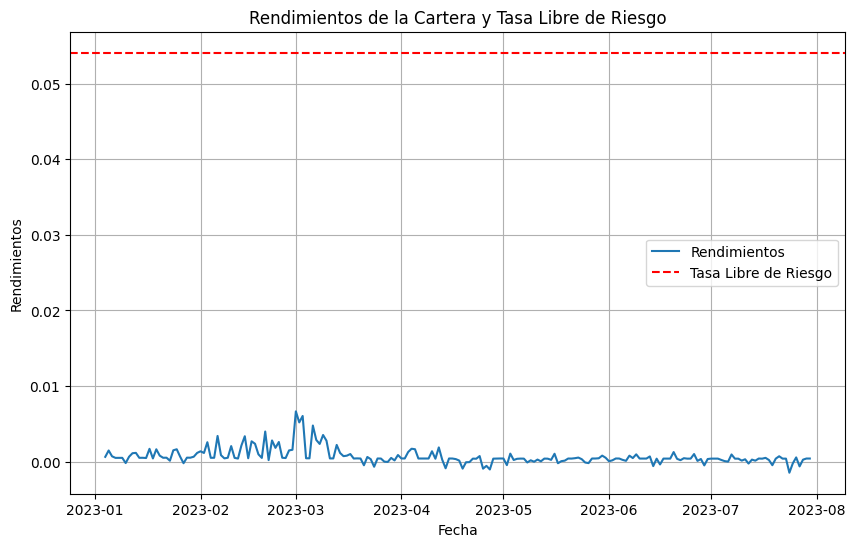

In [71]:
# Calcula los rendimientos diarios
GYC["Rendimientos"] = GYC["Valor_Unidad"].pct_change()
# Elimina la primera fila que tendrá NaN debido a los rendimientos
GYC = GYC.dropna()
# Calcula el rendimiento promedio y la desviación estándar de los rendimientos
rendimiento_promedio = GYC["Rendimientos"].mean()
desviacion_estandar_rendimientos = GYC["Rendimientos"].std()
# Tasa libre de riesgo
tasa_libre_riesgo = Banrep["BANREP"].mean() / 100  # Suponiendo que los valores están en porcentaje
# Calcula el Sharpe Ratio
sharpe_ratio = (rendimiento_promedio - tasa_libre_riesgo) / desviacion_estandar_rendimientos
# Imprime el Sharpe Ratio
print("Sharpe Ratio:", sharpe_ratio)
# Gráfica de los rendimientos
plt.figure(figsize=(10, 6))
plt.plot(GYC["Fecha"], GYC["Rendimientos"], label="Rendimientos")
plt.axhline(y=tasa_libre_riesgo, color='r', linestyle='--', label="Tasa Libre de Riesgo")
plt.xlabel("Fecha")
plt.ylabel("Rendimientos")
plt.title("Rendimientos de la Cartera y Tasa Libre de Riesgo")
plt.legend()
plt.grid(True)
plt.show()


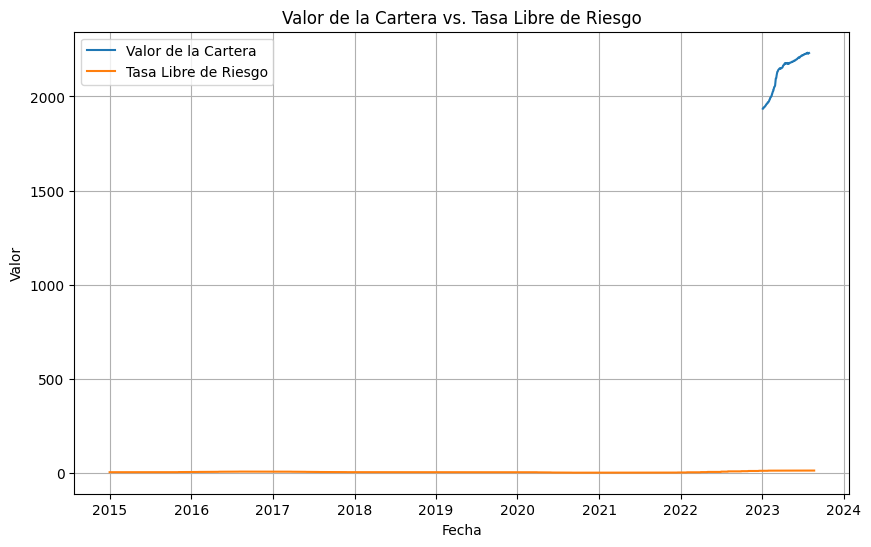